In [32]:
import pandas as pd

df = pd.read_csv('penjualan_mobil_toyota.csv')

In [33]:
df

,Bulan,Penjualan
0,2011-01,27619
1,2011-02,25532
2,2011-03,32275
3,2011-04,21128
4,2011-05,19554
...,...,...
144,2023-01,28970
145,2023-02,27336
146,2023-03,29471
147,2023-04,21518


In [34]:
df.isna().sum()

Bulan        0
Penjualan    0
dtype: int64

In [35]:
df.index = pd.to_datetime(df.Bulan, format='%Y-%m')
df = df.drop(columns = ['Bulan'])

In [36]:
df

,Penjualan
Bulan,
2011-01-01,27619
2011-02-01,25532
2011-03-01,32275
2011-04-01,21128
2011-05-01,19554
...,...
2023-01-01,28970
2023-02-01,27336
2023-03-01,29471


In [37]:
df = df.resample("M").sum()
df

,Penjualan
Bulan,
2011-01-31,27619
2011-02-28,25532
2011-03-31,32275
2011-04-30,21128
2011-05-31,19554
...,...
2023-01-31,28970
2023-02-28,27336
2023-03-31,29471


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 2011-01-31 to 2023-05-31
Freq: M
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Penjualan  149 non-null    int64
dtypes: int64(1)
memory usage: 2.3 KB


In [39]:
df = df.reset_index()

In [40]:
df

,Bulan,Penjualan
0,2011-01-31,27619
1,2011-02-28,25532
2,2011-03-31,32275
3,2011-04-30,21128
4,2011-05-31,19554
...,...,...
144,2023-01-31,28970
145,2023-02-28,27336
146,2023-03-31,29471
147,2023-04-30,21518


In [41]:

df['Penjualan'].describe()

count      149.000000
mean     28402.845638
std       7579.399557
min        695.000000
25%      25081.000000
50%      29362.000000
75%      33344.000000
max      40781.000000
Name: Penjualan, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6901a8d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6901b51f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6901a8a60>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6901b57f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6901b5ac0>],
 'means': []}

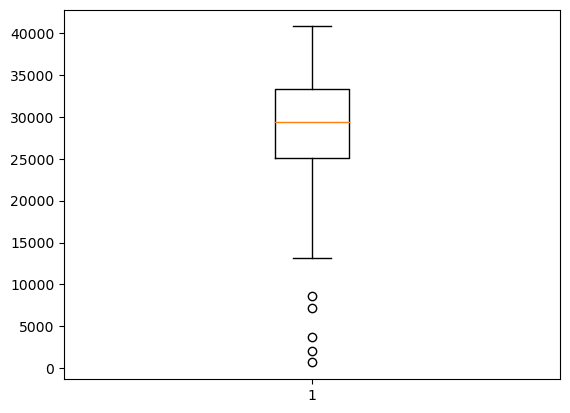

In [42]:
from matplotlib import pyplot as plt

plt.boxplot(df['Penjualan'])

In [43]:
from scipy import stats
import numpy as np


def outlier_detection(data_column,threshold):
    z_scr = stats.zscore(data_column)
    out = data_column[np.where(np.abs(z_scr) > threshold)[0]]
    return out

outlier_detection(df['Penjualan'], threshold = 2.5)

111    2053
112     695
113    3705
114    7224
115    8673
Name: Penjualan, dtype: int64

In [44]:
df_no_out = df.drop([111,112,113,114,115])
df_no_out

,Bulan,Penjualan
0,2011-01-31,27619
1,2011-02-28,25532
2,2011-03-31,32275
3,2011-04-30,21128
4,2011-05-31,19554
...,...,...
144,2023-01-31,28970
145,2023-02-28,27336
146,2023-03-31,29471
147,2023-04-30,21518


(array([ 3.,  2.,  0.,  8.,  5., 15., 29., 46., 26., 15.]),
 array([  695. ,  4703.6,  8712.2, 12720.8, 16729.4, 20738. , 24746.6,
        28755.2, 32763.8, 36772.4, 40781. ]),
 <BarContainer object of 10 artists>)

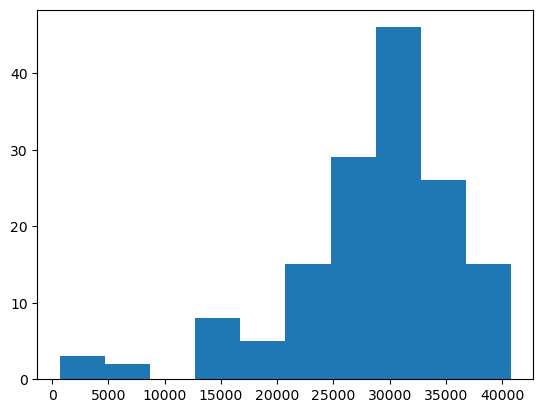

In [45]:
plt.hist(df['Penjualan'])

(array([ 6.,  5.,  3., 13., 18., 28., 28., 20., 11., 12.]),
 array([13150. , 15913.1, 18676.2, 21439.3, 24202.4, 26965.5, 29728.6,
        32491.7, 35254.8, 38017.9, 40781. ]),
 <BarContainer object of 10 artists>)

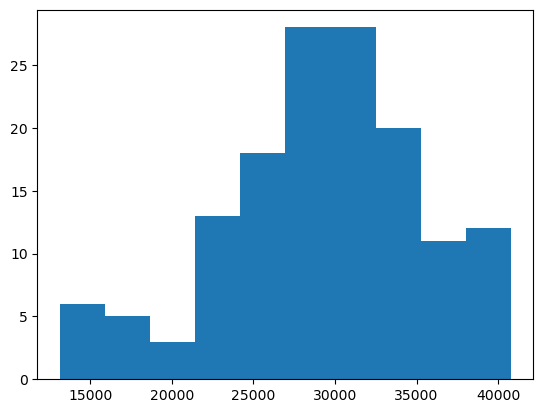

In [46]:
plt.hist(df_no_out['Penjualan'])

In [47]:
df_no_out.index = df_no_out.pop('Bulan')
df_no_out

,Penjualan
Bulan,
2011-01-31,27619
2011-02-28,25532
2011-03-31,32275
2011-04-30,21128
2011-05-31,19554
...,...
2023-01-31,28970
2023-02-28,27336
2023-03-31,29471


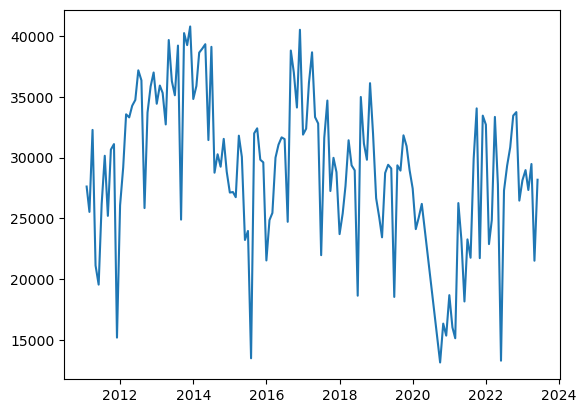

In [48]:
plt.plot(df_no_out.index, df_no_out['Penjualan'])

# Using XGBOOST

In [49]:
from xgboost import XGBRegressor

In [50]:
df_xg = df_no_out

In [51]:
df_xg = df_xg.reset_index()
df_xg

,Bulan,Penjualan
0,2011-01-31,27619
1,2011-02-28,25532
2,2011-03-31,32275
3,2011-04-30,21128
4,2011-05-31,19554
...,...,...
139,2023-01-31,28970
140,2023-02-28,27336
141,2023-03-31,29471
142,2023-04-30,21518


In [52]:
# extract more feature
df_xg['Day'] = df_xg['Bulan'].dt.day
df_xg['Month'] = df_xg['Bulan'].dt.month
df_xg['Year'] = df_xg['Bulan'].dt.year
df_xg['dayofWeek'] = df_xg['Bulan'].dt.week

df_xg['dayofyear'] = df_xg['Bulan'].dt.dayofyear
df_xg['sin_day'] = np.sin(df_xg['dayofyear'])
df_xg['cos_day'] = np.cos(df_xg['dayofyear'])

C:\Users\axcss\AppData\Local\Temp\ipykernel_27332\2058043775.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_xg['dayofWeek'] = df_xg['Bulan'].dt.week


In [53]:
df_xg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Bulan      144 non-null    datetime64[ns]
 1   Penjualan  144 non-null    int64         
 2   Day        144 non-null    int64         
 3   Month      144 non-null    int64         
 4   Year       144 non-null    int64         
 5   dayofWeek  144 non-null    int64         
 6   dayofyear  144 non-null    int64         
 7   sin_day    144 non-null    float64       
 8   cos_day    144 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 10.2 KB


In [54]:
# Split

train = df_xg[0:139]
X_train=train.drop(['Penjualan','Bulan'],axis=1)
y_train=train['Penjualan']

# i want test set are the information on 2023
test = df_xg[139:]
X_test=test.drop(['Penjualan','Bulan'],axis=1)
y_test=test['Penjualan']

In [55]:

from xgboost import plot_importance, plot_tree
import xgboost as xgb

reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
reg.fit(X_train, y_train,
        verbose=False)  # Change verbose to True if you want to see it train
yhat = reg.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error

mse_XgbReg = mean_squared_error(y_test,yhat)
mse_XgbReg

63753032.85430851

# Model using facebook prophet

In [58]:
df_prophet = df_no_out.copy()
df_prophet=df_prophet.reset_index()
df_prophet

,Bulan,Penjualan
0,2011-01-31,27619
1,2011-02-28,25532
2,2011-03-31,32275
3,2011-04-30,21128
4,2011-05-31,19554
...,...,...
139,2023-01-31,28970
140,2023-02-28,27336
141,2023-03-31,29471
142,2023-04-30,21518


In [60]:
df_prophet.columns = ['ds','y']
df_prophet

,ds,y
0,2011-01-31,27619
1,2011-02-28,25532
2,2011-03-31,32275
3,2011-04-30,21128
4,2011-05-31,19554
...,...,...
139,2023-01-31,28970
140,2023-02-28,27336
141,2023-03-31,29471
142,2023-04-30,21518


Train test split

In [61]:
train = df_prophet[0:139]

# i want test set are the information on 2023
test = df_prophet[139:]

In [62]:
test

,ds,y
139,2023-01-31,28970
140,2023-02-28,27336
141,2023-03-31,29471
142,2023-04-30,21518
143,2023-05-31,28178


In [63]:
#!pip install prophet

Prophet Architecture

In [64]:
from prophet import Prophet

m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(train)

20:35:37 - cmdstanpy - INFO - Chain [1] start processing
20:35:37 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
forecast_eval = m.predict(test)
forecast_eval

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-31,21490.464154,11252.766372,34348.400532,21490.128049,21490.796250,1702.910515,1702.910515,1702.910515,3990.42085,3990.42085,3990.42085,-2287.510335,-2287.510335,-2287.510335,0.0,0.0,0.0,23193.374669
1,2023-02-28,21442.706389,14095.258352,34962.459065,21441.659255,21443.702677,2890.397529,2890.397529,2890.397529,3990.42085,3990.42085,3990.42085,-1100.023321,-1100.023321,-1100.023321,0.0,0.0,0.0,24333.103919
2,2023-03-31,21389.831721,17406.481797,38340.972916,21388.056796,21391.857090,6955.293891,6955.293891,6955.293891,3990.42085,3990.42085,3990.42085,2964.873041,2964.873041,2964.873041,0.0,0.0,0.0,28345.125612
3,2023-04-30,21338.662688,15180.730227,37481.447860,21335.980852,21341.622525,5167.417267,5167.417267,5167.417267,3990.42085,3990.42085,3990.42085,1176.996417,1176.996417,1176.996417,0.0,0.0,0.0,26506.079955
4,2023-05-31,21285.788019,12021.364085,34012.880208,21281.963977,21289.799628,1545.747233,1545.747233,1545.747233,3990.42085,3990.42085,3990.42085,-2444.673617,-2444.673617,-2444.673617,0.0,0.0,0.0,22831.535252


Evaluation

In [66]:
from sklearn.metrics import mean_squared_error

mse_Prophet = mean_squared_error(test['y'],forecast_eval['yhat'])
mse_Prophet

19424001.03169309

# Xgboost better that Prophet?

In [67]:
mse_XgbReg > mse_Prophet

True

since xgboost have bigger error indicates that prophet perform better

# The prediction to this date of month (february 2024) using Prophet

In [68]:
future = m.make_future_dataframe(periods=14,freq='M')
forecast_1yearahead = m.predict(future)

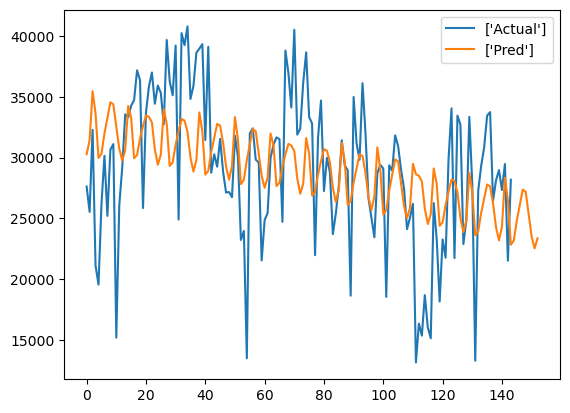

In [69]:
plt.plot(df_prophet['y'], label=['Actual'])
plt.plot(forecast_1yearahead['yhat'], label=['Pred'])
plt.legend()
plt.show()

In [70]:
dummy = forecast_1yearahead[['yhat','ds']][144:].copy()
dummy.index = dummy.pop('ds')
dummy

,yhat
ds,
2023-06-30,23179.249557
2023-07-31,24811.997868
2023-08-31,26064.342016
2023-09-30,27362.978174
2023-10-31,27185.264148
2023-11-30,25316.895563
2023-12-31,23518.767472
2024-01-31,22532.530748
2024-02-29,23367.545094


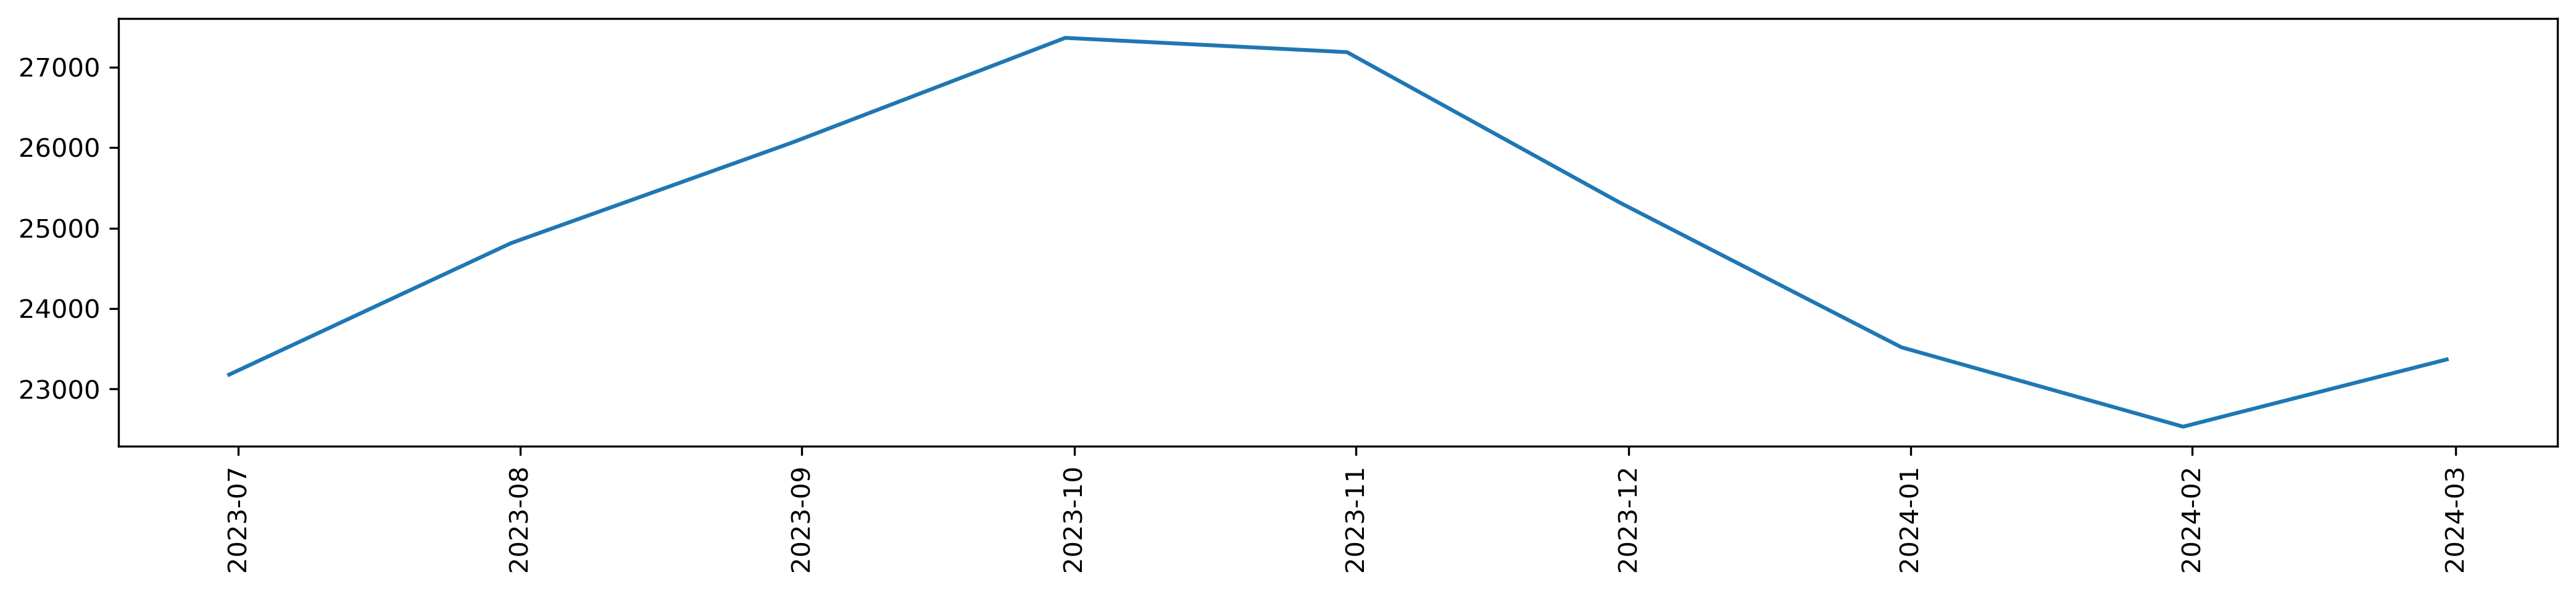

In [76]:
#the future predict plot
plt.plot(dummy['yhat'])
plt.xticks(rotation='vertical')
plt.show()